### Librerías

In [3]:
import pandas as pd
from plotnine import *

### Se carga el dataset

In [4]:
df = pd.read_csv("dataset_SCL.csv")

C:\Users\mlopez\AppData\Local\Temp\ipykernel_14588\1100006479.py:1: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.


### Exploracion de datos

In [5]:
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


#### Casteo fecha

In [6]:
df.columns = df.columns.str.replace('-', '_')
df.Fecha_I = pd.to_datetime(df.Fecha_I, format="%Y-%m-%d %H:%M:%S")
df.Fecha_O = pd.to_datetime(df.Fecha_O, format="%Y-%m-%d %H:%M:%S")

df.Vlo_I = df.Vlo_I.astype('category') # SE DEFINE COMO CATEGORÍA YA QUE EXISTEN NUMERO DE VUELO CON LETRAS
df.Ori_I = df.Ori_I.astype('category')
df.Des_I = df.Des_I.astype('category')
df.Emp_I = df.Emp_I.astype('category')

df.Vlo_O = df.Vlo_O.astype('category')
df.Ori_O = df.Ori_O.astype('category')
df.Des_O = df.Des_O.astype('category')
df.Emp_O = df.Emp_O.astype('category')

df.DIANOM = df.DIANOM.astype('category')
df.TIPOVUELO = df.TIPOVUELO.astype('category')
df.OPERA = df.OPERA.astype('category')
df.SIGLAORI = df.SIGLAORI.astype('category')
df.SIGLADES = df.SIGLADES.astype('category')

df['Hora_I'] = df['Fecha_I'].dt.time
df['Hora_O'] = df['Fecha_O'].dt.time


In [7]:
df.head()

,Fecha_I,Vlo_I,Ori_I,Des_I,Emp_I,Fecha_O,Vlo_O,Ori_O,Des_O,Emp_O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,Hora_I,Hora_O
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami,23:30:00,23:33:00
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami,23:30:00,23:39:00
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami,23:30:00,23:39:00
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami,23:30:00,23:33:00
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami,23:30:00,23:28:00


In [8]:
print(df.Ori_I.unique())
print(df.Ori_O.unique())
print(df.Des_I.unique())
print(df.Des_O.unique())

['SCEL']
Categories (1, object): ['SCEL']
['SCEL']
Categories (1, object): ['SCEL']
['KMIA', 'KDFW', 'SAEZ', 'CYYZ', 'LFPG', ..., 'SAWH', 'EGYP', 'SULS', 'SLCB', 'SARI']
Length: 64
Categories (64, object): ['CYYZ', 'EGLL', 'EGYP', 'KATL', ..., 'SULS', 'SUMU', 'YMML', 'YSSY']
['KMIA', 'KDFW', 'SAEZ', 'CYYZ', 'LFPG', ..., 'SPSO', 'SAWH', 'EGYP', 'SULS', 'SLCB']
Length: 63
Categories (63, object): ['CYYZ', 'EGLL', 'EGYP', 'KATL', ..., 'SULS', 'SUMU', 'YMML', 'YSSY']


Primeros hallazgos, solo hay información de despegues y existe al menos un codigo de aeropuerto que se planifica y no se operó

In [9]:
for i in df.Des_I.unique():
    if i not in df.Des_O.unique():
        print(i)

SEQU
SARI


como veo que hay dos en los que sucede, vere en la otra direccion.

In [10]:
for i in df.Des_O.unique():
    if i not in df.Des_I.unique():
        print(i)

KIAD


##### Histograma de despegues

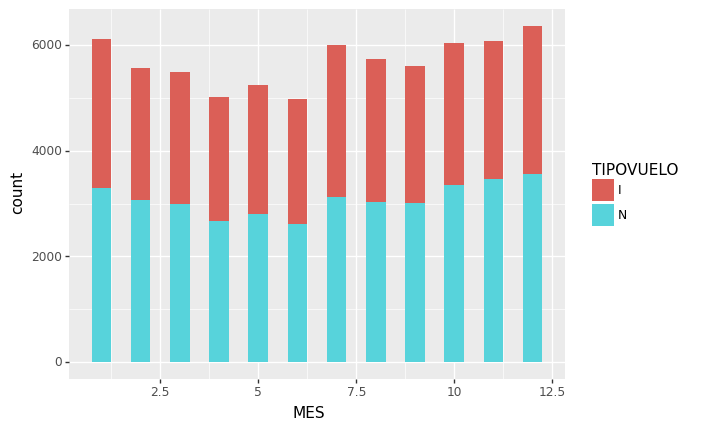

<ggplot: (140698028975)>

In [11]:
g = (
    ggplot(df, aes(x='MES', y=after_stat('count'),fill='TIPOVUELO'))
    + geom_histogram(binwidth=0.5)
    )
g

Podemos observar una alza en los meses de temporada alta o vacaciones.

In [15]:
df_Temp = df

df_Temp['datehour'] = df_Temp['Fecha_O'].dt.hour


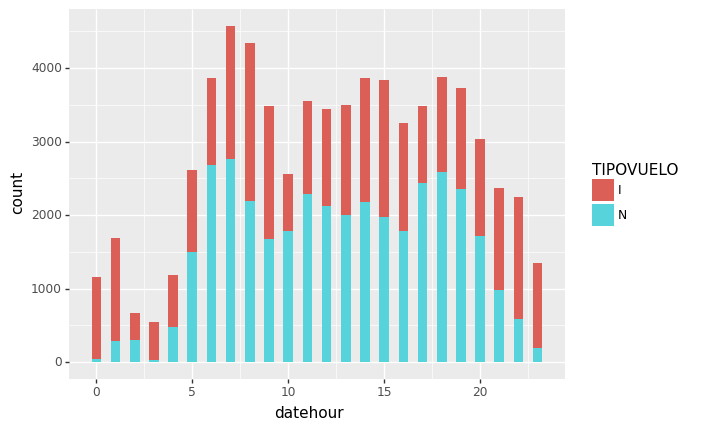

<ggplot: (140698998574)>

In [13]:
g = (
    ggplot(df_Temp, aes(x='datehour', y=after_stat('count'),fill='TIPOVUELO'))
    + geom_histogram(binwidth=0.5)
    )
g

Se visualiza una relacion con las horas laborables del día, los vuelos internacionales no se ven tan afectados por esto.

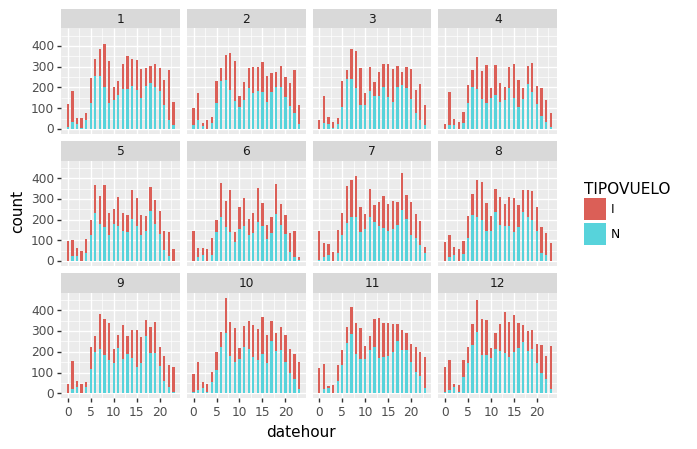

<ggplot: (140698744254)>

In [14]:
g = (
    ggplot(df_Temp, aes(x='datehour', y=after_stat('count'),fill='TIPOVUELO'))
    + geom_histogram(binwidth=0.5)
    + facet_wrap('MES')
    )
g

La estructura visualizada por la agrupaciones anual se mantiene en los meses del año por separado

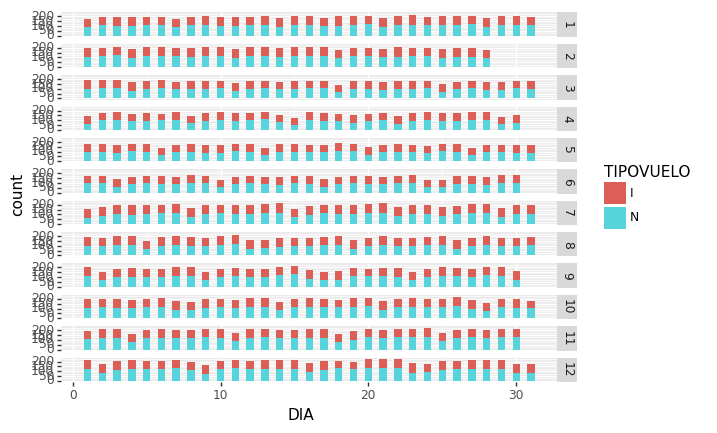

<ggplot: (156197279802)>

In [75]:
g = (
    ggplot(df, aes(x='DIA', y=after_stat('count'),fill='TIPOVUELO'))
    + facet_grid('MES~')
    + geom_histogram(binwidth=0.5)
    )
g

a nivel del día de la semana no se visualiza algun comportamiento.

In [ ]:
df[df.MES ]

In [29]:
from datetime import datetime

# 15-12-2017 -> 3-3-2018
date_inicio_1_str = '15-12-2017'
date_inicio_1 = datetime.strptime(date_inicio_1_str, '%d-%m-%Y')
date_fin_1_str = ''
date_fin_1 = datetime.strptime(date_fin_1_str, '%d-%m-%Y')

# 15-12-2017 -> 3-3-2018
date_inicio_1_str = '15-12-2017'
date_inicio_1 = datetime.strptime(date_inicio_1_str, '%d-%m-%Y')
date_fin_1_str = ''
date_fin_1 = datetime.strptime(date_fin_1_str, '%d-%m-%Y')

In [30]:
df[(df['Fecha_I'] >= date_inicio_1) & (df['Fecha_I'] <= date_fin_1)]

,Fecha_I,Vlo_I,Ori_I,Des_I,Emp_I,Fecha_O,Vlo_O,Ori_O,Des_O,Emp_O,...,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,Hora_I,Hora_O,datehour
61849,2017-12-16 23:55:00,226,SCEL,KMIA,AAL,2017-12-16 23:53:00,226,SCEL,KMIA,AAL,...,12,2017,Sabado,I,American Airlines,Santiago,Miami,23:55:00,23:53:00,23
61850,2017-12-17 23:55:00,226,SCEL,KMIA,AAL,2017-12-17 23:51:00,226,SCEL,KMIA,AAL,...,12,2017,Domingo,I,American Airlines,Santiago,Miami,23:55:00,23:51:00,23
61851,2017-12-18 23:55:00,226,SCEL,KMIA,AAL,2017-12-18 23:58:00,226,SCEL,KMIA,AAL,...,12,2017,Lunes,I,American Airlines,Santiago,Miami,23:55:00,23:58:00,23
61852,2017-12-20 23:55:00,226,SCEL,KMIA,AAL,2017-12-21 00:46:00,226,SCEL,KMIA,AAL,...,12,2017,Jueves,I,American Airlines,Santiago,Miami,23:55:00,00:46:00,0
61853,2017-12-21 23:55:00,226,SCEL,KMIA,AAL,2017-12-21 23:55:00,226,SCEL,KMIA,AAL,...,12,2017,Jueves,I,American Airlines,Santiago,Miami,23:55:00,23:55:00,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,...,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima,14:55:00,15:41:00,15
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,...,12,2017,Lunes,I,JetSmart SPA,Santiago,Lima,14:55:00,15:11:00,15
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,...,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima,14:55:00,15:35:00,15
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,...,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima,14:55:00,15:08:00,15


In [17]:
df['AÑO'].unique()

array([2017, 2018], dtype=int64)

In [31]:
df['Fecha_O'].min()

Timestamp('2017-01-01 00:04:00')

In [32]:
df['Fecha_O'].max()

Timestamp('2018-01-01 00:12:00')

In [34]:
df[df['AÑO']==2018]

,Fecha_I,Vlo_I,Ori_I,Des_I,Emp_I,Fecha_O,Vlo_O,Ori_O,Des_O,Emp_O,...,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,Hora_I,Hora_O,datehour
66918,2017-12-31 23:55:00,602,SCEL,KLAX,LAN,2018-01-01 00:02:00,602.0,SCEL,KLAX,LAN,...,1,2018,Lunes,I,Grupo LATAM,Santiago,Los Angeles,23:55:00,00:02:00,0
66947,2017-12-31 23:40:00,622,SCEL,MMMX,LAN,2018-01-01 00:12:00,622.0,SCEL,MMMX,LAN,...,1,2018,Lunes,I,Grupo LATAM,Santiago,Ciudad de Mexico,23:40:00,00:12:00,0


In [ ]:
g = (
    ggplot(df, aes(x='HORA', y=after_stat('count'),fill='TIPOVUELO'))
    + facet_grid('MES~')
    + geom_histogram(binwidth=0.5)
    )
g

In [64]:
df[df.Des_I.isin(['SEQU','SARI'])]

,Fecha_I,Vlo_I,Ori_I,Des_I,Emp_I,Fecha_O,Vlo_O,Ori_O,Des_O,Emp_O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
55144,2017-10-06 00:55:00,1260,SCEL,SEQU,LAN,2017-10-06 02:15:00,1260,SCEL,SEQM,LAN,6,10,2017,Viernes,I,Grupo LATAM,Santiago,Quito
67697,2017-12-16 02:45:00,1261,SCEL,SARI,LAN,2017-12-16 02:43:00,1261.0,SCEL,SBFI,LAN,16,12,2017,Sabado,I,Grupo LATAM,Santiago,Cataratas Iguacu


In [ ]:
Veremos los dos lugares que se planifican y no se operan

In [58]:
df.columns = df.columns.str.replace('-', '_')
df[df.Des_I!=df.Des_O]

,Fecha_I,Vlo_I,Ori_I,Des_I,Emp_I,Fecha_O,Vlo_O,Ori_O,Des_O,Emp_O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
1397,2017-01-17 19:20:00,25,SCEL,SCTE,SKU,2017-01-17 19:46:00,25,SCEL,SCQP,SKU,17,1,2017,Martes,N,Sky Airline,Santiago,Temuco
7290,2017-02-15 06:25:00,11,SCEL,SCTE,SKU,2017-02-15 06:25:00,11,SCEL,SCQP,SKU,15,2,2017,Miercoles,N,Sky Airline,Santiago,Temuco
7520,2017-02-27 06:40:00,71,SCEL,SCIE,SKU,2017-02-27 09:07:00,71,SCEL,SCQP,SKU,27,2,2017,Lunes,N,Sky Airline,Santiago,Temuco
8456,2017-02-15 06:10:00,57,SCEL,SCTE,LAN,2017-02-15 06:12:00,57,SCEL,SCQP,LAN,15,2,2017,Miercoles,N,Grupo LATAM,Santiago,Temuco
12787,2017-03-18 06:25:00,11,SCEL,SCTE,SKU,2017-03-18 06:29:00,11,SCEL,SCQP,SKU,18,3,2017,Sabado,N,Sky Airline,Santiago,Temuco
12823,2017-03-22 12:50:00,17,SCEL,SCBA,SKU,2017-03-22 12:48:00,17,SCEL,SCTE,SKU,22,3,2017,Miercoles,N,Sky Airline,Santiago,Puerto Montt
16169,2017-03-13 23:20:00,532,SCEL,KJFK,LAN,2017-03-14 01:35:00,1346,SCEL,KMIA,LAN,14,3,2017,Martes,I,Grupo LATAM,Santiago,Miami
16937,2017-03-22 17:00:00,1446,SCEL,SEGU,LAN,2017-03-22 17:11:00,1361,SCEL,SABE,LAN,22,3,2017,Miercoles,I,Grupo LATAM,Santiago,Buenos Aires
18293,2017-04-14 18:40:00,25,SCEL,SCTE,SKU,2017-04-14 18:48:00,25,SCEL,SCQP,SKU,14,4,2017,Viernes,N,Sky Airline,Santiago,Temuco
20444,2017-04-14 22:00:00,289,SCEL,SCTE,LAN,2017-04-14 22:01:00,289,SCEL,SCCI,LXP,14,4,2017,Viernes,N,Grupo LATAM,Santiago,Punta Arenas


In [55]:
df.Des_O

0        KMIA
1        KMIA
2        KMIA
3        KMIA
4        KMIA
         ... 
68201    SPJC
68202    SPJC
68203    SPJC
68204    SPJC
68205    SPJC
Name: Des_O, Length: 68206, dtype: category
Categories (63, object): ['CYYZ', 'EGLL', 'EGYP', 'KATL', ..., 'SULS', 'SUMU', 'YMML', 'YSSY']

In [46]:
df[df.SIGLADES=='Santiago']

,Fecha_I,Vlo_I,Ori_I,Des_I,Emp_I,Fecha_O,Vlo_O,Ori_O,Des_O,Emp_O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES


In [ ]:
df.groupby()

In [12]:
#df[df['Fecha-I'].dt.month==5]
#weekday 

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
22170,2017-05-01 21:00:00,912,SCEL,KMIA,AAL,2017-05-01 20:58:00,912,SCEL,KMIA,AAL,1,5,2017,Lunes,I,American Airlines,Santiago,Miami
22171,2017-05-02 21:00:00,912,SCEL,KMIA,AAL,2017-05-02 21:00:00,912,SCEL,KMIA,AAL,2,5,2017,Martes,I,American Airlines,Santiago,Miami
22172,2017-05-03 21:00:00,912,SCEL,KMIA,AAL,2017-05-03 21:02:00,912,SCEL,KMIA,AAL,3,5,2017,Miercoles,I,American Airlines,Santiago,Miami
22173,2017-05-04 21:00:00,912,SCEL,KMIA,AAL,2017-05-04 22:02:00,912,SCEL,KMIA,AAL,4,5,2017,Jueves,I,American Airlines,Santiago,Miami
22174,2017-05-05 21:00:00,912,SCEL,KMIA,AAL,2017-05-05 20:57:00,912,SCEL,KMIA,AAL,5,5,2017,Viernes,I,American Airlines,Santiago,Miami
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27404,2017-05-06 08:00:00,1704,SCEL,SPJC,LAW,2017-05-06 08:05:00,1704,SCEL,SPJC,JMR,6,5,2017,Sabado,I,Latin American Wings,Santiago,Lima
27405,2017-05-11 06:00:00,1704,SCEL,SPJC,LAW,2017-05-11 05:50:00,1704,SCEL,SPJC,JMR,11,5,2017,Jueves,I,Latin American Wings,Santiago,Lima
27406,2017-05-20 06:00:00,1704,SCEL,SPJC,LAW,2017-05-20 08:07:00,1704,SCEL,SPJC,JMR,20,5,2017,Sabado,I,Latin American Wings,Santiago,Lima
27407,2017-05-29 06:30:00,1031,SCEL,SCIE,LAW,2017-05-29 06:49:00,1031,SCEL,SCIE,JMR,29,5,2017,Lunes,N,Latin American Wings,Santiago,Concepcion
